In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.30.0 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
kfp 1.8.20 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
kfp 1.8.20 requires PyYAML<6,>=5.3, but you have pyyaml 6.0 which is incompatible.
gcsfs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.4.0 which is incompatible.
beatrix-jupyterlab 2023.46.184821 requires jupyter-server~=1.16, but you have jupyter-server 2.5.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 10.0.1 which is incompa

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=10):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Searching for 'rosa flor'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


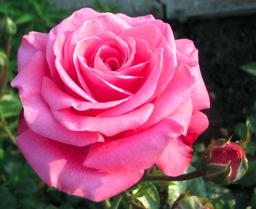

In [3]:
from fastdownload import download_url
# Ocupamos el siguiente modulo para abrir las imagenes con `Image.open` usar la clase Path, la función `doc`, etc
from fastai.vision.all import *

download_url(search_images('rosa flor', max_images=1)[0], 'rosa.jpg', show_progress=False)
Image.open('rosa.jpg').to_thumb(256,256)

Searching for 'flor de dalia'


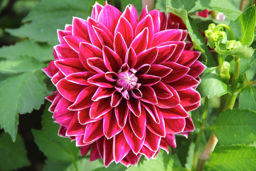

In [4]:
download_url(search_images('flor de dalia', max_images=1)[0], 'dalia.jpg', show_progress=False)
Image.open('dalia.jpg').to_thumb(256,256)

Searching for 'sunflower flower'


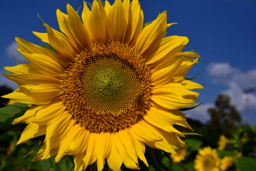

In [7]:
download_url(search_images('sunflower flower', max_images=1)[0], 'sunflower.jpg', show_progress=False)
Image.open('sunflower.jpg').to_thumb(256,256)

Searching for 'pink primrose'


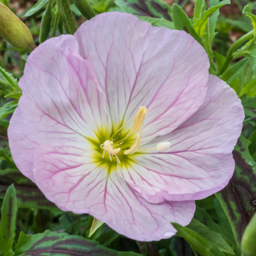

In [6]:
download_url(search_images('pink primrose', max_images=1)[0], 'pink_primrose.jpg', show_progress=False)
Image.open('pink_primrose.jpg').to_thumb(256,256)

In [8]:
searches = 'sunflower flower','pink primrose flower' # Karen: búsquedas de imagenes tipo Google Images
path = Path('flowers')
from time import sleep

for o in searches: # Karen: la 'o' se va a iterar, primero toma la cadena 'forest' y después la cadena 'bird'
    dest = (path/o)# Karen: ¿qué significa path/o? La direccion donde lo vamos a guardar. El signo '/' no es para una división, sino que es la diagonal utilizada para especificar la direccion de la computadora donde está guardado un archivo.
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}')) 
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'sunflower flower'
Searching for 'pink primrose flower'


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

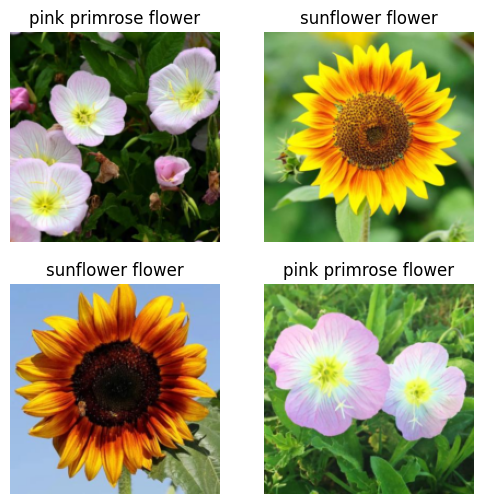

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #Karen: ImagenBlock=input, CategoryBlock=output
    get_items=get_image_files, # Karen: los datos de entrenemiento; get_image_files es una función
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #Karen: separa los datos en un conjunto de entrenamiento y validación
    get_y=parent_label, #Karen: y es la variable objetivo, este dato lo toma del nombre del folder en que está cada imagen
    item_tfms=[Resize(192, method='squish')] # Para que todas las imágenes sean del mismo tamaño (solo si para Computer Vision)
).dataloaders(path, bs=4)

dls.show_batch(max_n=6)

In [11]:
len(dls.train)

3

In [12]:
len(dls.valid)

1

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate) #Karen: dls=datos, restnet18= modelo = red neuronal
learn.fine_tune(1) #no empezamos desde cero, empezamos de un modelo preentrenado, fastai ajusta los pesos para que el modelo aprenda a reconocer nuestro conjunto de datos

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 71.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.338883,0.347549,0.333333,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.795316,0.193980,0.000000,00:01


In [15]:
flower_name, index, probs=learn.predict('sunflower.jpg')
print(f'It is a {flower_name} with probability {probs[index]:.4f}')

It is a sunflower flower with probability 0.9705


In [16]:
flower_name, index, probs=learn.predict('pink_primrose.jpg')
print(f'It is a {flower_name} with probability {probs[index]:.4f}')

It is a pink primrose flower with probability 0.6853


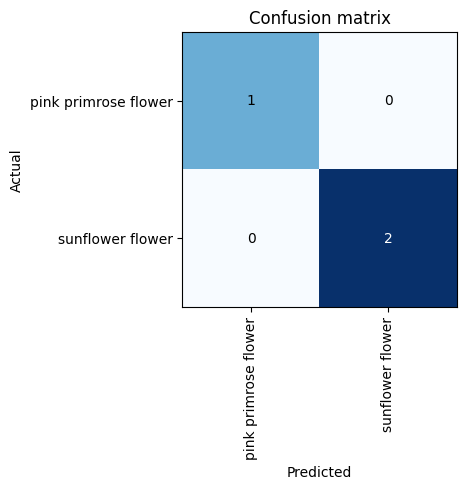

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

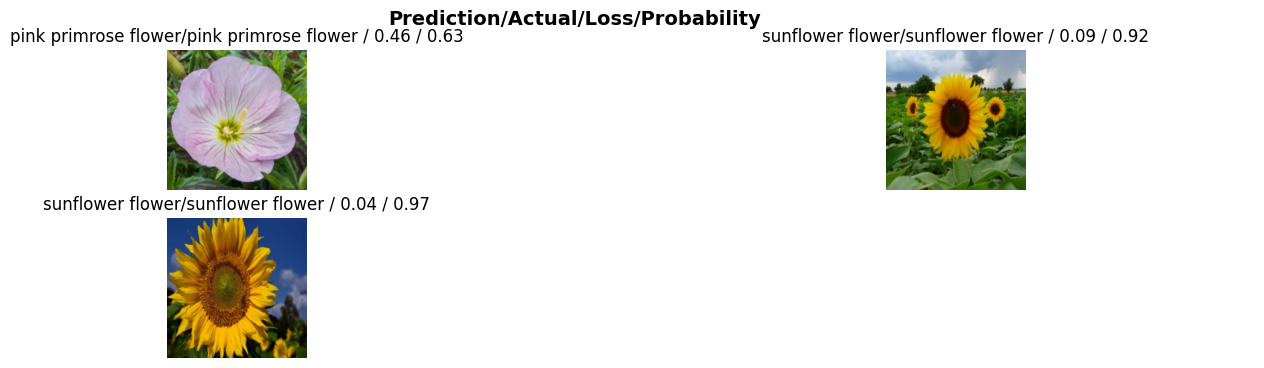

In [20]:
interp.plot_top_losses(3, nrows=2,figsize=(17,4))